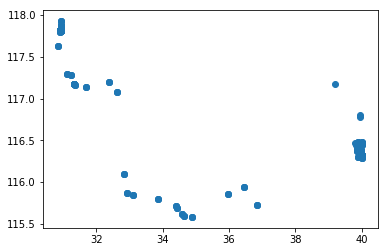

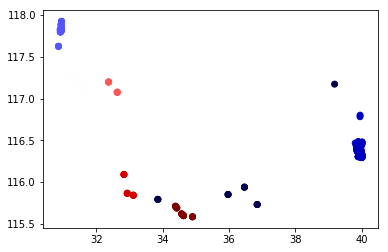

The silhouette score is: 0.9154270278241475


In [37]:
import mysql.connector
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

import mysql.connector
conn = mysql.connector.connect(user='root', password='',
                           host='localhost', database='semtraclus')
print(conn)

# Define a function to retrieve the latitude and longitude values from a table
def get_location_data(table_name):
    cursor = conn.cursor()
    cursor.execute(f"SELECT ST_X(location), ST_Y(location) FROM {table_name}")
    results = cursor.fetchall()
    return np.array(results)

def get_location_data_extra(table_name):
    cursor = conn.cursor()
    cursor.execute(f"SELECT  ST_X(location2), ST_Y(location2) FROM {table_name}")
    results = cursor.fetchall()
    return np.array(results)

# Retrieve the latitude and longitude values from multiple tables
points = np.concatenate([get_location_data("staypoints"), get_location_data("stay_points"), get_location_data("repeated_rows"), get_location_data("intersecting_points"), get_location_data_extra("intersecting_points")])

#print(points)
# Preprocess the data if necessary
# ...

# Apply DBSCAN clustering with the chosen value of eps
dbscan = DBSCAN(eps=0.4, min_samples=4)
labels = dbscan.fit_predict(points)

# ... the rest of the code remains the same



# Apply the DBSCAN algorithm to the data
#labels = dbscan.fit_predict(points)

plt.scatter(points[:, 1], points[:, 0], cmap='viridis')
plt.show()

# Analyze the clustering results and visualize them
plt.scatter(points[:, 1], points[:, 0], c=labels, cmap='seismic')
plt.show()

from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(points, labels)

print("The silhouette score is:", silhouette_avg)

In [38]:
# Create a new table for clustering results
cursor = conn.cursor()
cursor.execute("CREATE TABLE clustering_results (id INT AUTO_INCREMENT PRIMARY KEY, label INT, location POINT, loc_id VARCHAR(20))")

# Insert the clustering results into the table
for i in range(len(labels)):
    loc_id = f"{points[i][1]:.6f}{points[i][0]:.6f}"
    cursor.execute("INSERT INTO clustering_results (label, location, loc_id) VALUES (%s, POINT(%s, %s), %s)", (int(labels[i]), float(points[i, 1]), float(points[i, 0]), loc_id))

# Commit the changes and close the connection
conn.commit()
cursor.close()
conn.close()


In [25]:
unique_labels = np.unique(labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
print(f"Number of clusters: {n_clusters}")


Number of clusters: 6
